In [11]:
import pandas as pd
from prophet import Prophet
import itertools
import numpy as np
import plotly.graph_objects as go
import yfinance as yf

In [38]:
df_temp=pd.read_csv("TATACHEML.csv")


df_temp.tail()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
3458,2021-10-05 11:15:00+05:30,939.700012,942.900024,937.049988,937.650024,937.650024,398447
3459,2021-10-05 12:15:00+05:30,937.599976,939.950012,934.049988,937.700012,937.700012,308041
3460,2021-10-05 13:15:00+05:30,937.700012,939.450012,934.000000,936.849976,936.849976,334667
3461,2021-10-05 14:15:00+05:30,936.900024,938.750000,928.599976,930.099976,930.099976,413500
3462,2021-10-05 15:15:00+05:30,930.250000,934.000000,929.799988,932.000000,932.000000,245542


In [13]:

#df_temp = pd.read_csv("IRCTC.csv")

In [14]:
df_temp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-07,576.849976,579.849976,568.099976,577.049988,541.969849,397181
1,2019-10-09,578.799988,591.000000,576.000000,588.349976,552.582947,226550
2,2019-10-10,588.500000,591.599976,576.500000,578.849976,543.660400,309118
3,2019-10-11,581.950012,595.500000,579.200012,593.650024,557.560730,499901
4,2019-10-14,593.700012,598.500000,587.650024,590.000000,554.132629,262329
...,...,...,...,...,...,...,...
490,2021-09-29,905.000000,937.599976,895.200012,933.099976,933.099976,3724758
491,2021-09-30,940.849976,945.500000,915.400024,919.299988,919.299988,3823155
492,2021-10-01,916.700012,928.450012,907.200012,910.900024,910.900024,1597635
493,2021-10-04,917.000000,940.000000,908.650024,935.750000,935.750000,2679786


In [15]:

df=df_temp[["Date","Close"]]


In [16]:
df[20:]

,Date,Close
20,2019-11-07,643.799988
21,2019-11-08,631.549988
22,2019-11-11,634.200012
23,2019-11-13,632.299988
24,2019-11-14,631.400024
...,...,...
490,2021-09-29,933.099976
491,2021-09-30,919.299988
492,2021-10-01,910.900024
493,2021-10-04,935.750000


In [17]:
df

,Date,Close
0,2019-10-07,577.049988
1,2019-10-09,588.349976
2,2019-10-10,578.849976
3,2019-10-11,593.650024
4,2019-10-14,590.000000
...,...,...
490,2021-09-29,933.099976
491,2021-09-30,919.299988
492,2021-10-01,910.900024
493,2021-10-04,935.750000


In [18]:
date = pd.read_csv("date.csv")
df["Date"] = date["Date"]

<ipython-input-18-74f692d98e8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = date["Date"]


In [19]:
df

,Date,Close
0,9/23/2020,577.049988
1,9/24/2020,588.349976
2,9/25/2020,578.849976
3,9/26/2020,593.650024
4,9/27/2020,590.000000
...,...,...
490,1/26/2022,933.099976
491,1/27/2022,919.299988
492,1/28/2022,910.900024
493,1/29/2022,935.750000


In [20]:
df.dtypes

Date      object
Close    float64
dtype: object

In [21]:
#df["Datetime"]=pd.to_datetime(df["Datetime"])

In [22]:
df.dtypes

Date      object
Close    float64
dtype: object

In [23]:
df.columns=['ds','y']

In [24]:
df[-20:]

,ds,y
475,1/11/2022,823.049988
476,1/12/2022,832.299988
477,1/13/2022,829.250000
478,1/14/2022,837.299988
479,1/15/2022,835.750000
480,1/16/2022,858.799988
481,1/17/2022,865.400024
482,1/18/2022,844.500000
483,1/19/2022,799.750000
484,1/20/2022,801.950012


In [25]:
m= Prophet(interval_width=0.9,daily_seasonality=True)
model = m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [26]:
future = m.make_future_dataframe(periods=271,freq='D')
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-23,598.933274,572.930925,814.068268,598.933274,598.933274,96.430245,96.430245,96.430245,99.694715,99.694715,99.694715,-3.264470,-3.264470,-3.264470,0.0,0.0,0.0,695.363520
1,2020-09-24,597.472624,566.500170,809.746458,597.472624,597.472624,96.950902,96.950902,96.950902,99.694715,99.694715,99.694715,-2.743813,-2.743813,-2.743813,0.0,0.0,0.0,694.423526
2,2020-09-25,596.011974,571.362851,823.717768,596.011974,596.011974,99.022019,99.022019,99.022019,99.694715,99.694715,99.694715,-0.672696,-0.672696,-0.672696,0.0,0.0,0.0,695.033993
3,2020-09-26,594.551323,558.410822,822.190912,594.551323,594.551323,99.873304,99.873304,99.873304,99.694715,99.694715,99.694715,0.178589,0.178589,0.178589,0.0,0.0,0.0,694.424628
4,2020-09-27,593.090673,570.194433,825.171487,593.090673,593.090673,100.989422,100.989422,100.989422,99.694715,99.694715,99.694715,1.294707,1.294707,1.294707,0.0,0.0,0.0,694.080095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,2022-10-24,1193.983777,663.070527,1910.469742,595.228939,1790.986437,101.188563,101.188563,101.188563,99.694715,99.694715,99.694715,1.493847,1.493847,1.493847,0.0,0.0,0.0,1295.172340
762,2022-10-25,1195.534300,689.034010,1955.780782,593.069289,1795.632256,103.408551,103.408551,103.408551,99.694715,99.694715,99.694715,3.713836,3.713836,3.713836,0.0,0.0,0.0,1298.942851
763,2022-10-26,1197.084823,679.460260,1913.675301,591.012978,1799.631079,96.430245,96.430245,96.430245,99.694715,99.694715,99.694715,-3.264470,-3.264470,-3.264470,0.0,0.0,0.0,1293.515068
764,2022-10-27,1198.635345,649.085613,1899.545639,588.956667,1803.535600,96.950902,96.950902,96.950902,99.694715,99.694715,99.694715,-2.743813,-2.743813,-2.743813,0.0,0.0,0.0,1295.586247


In [27]:
print(forecast[["ds","yhat"]][-25:])
print(df[-10:])
forecast.dtypes
df.dtypes

            ds         yhat
741 2022-10-04  1266.381876
742 2022-10-05  1260.954093
743 2022-10-06  1263.025272
744 2022-10-07  1266.646912
745 2022-10-08  1269.048719
746 2022-10-09  1271.715360
747 2022-10-10  1273.465023
748 2022-10-11  1277.235534
749 2022-10-12  1271.807751
750 2022-10-13  1273.878931
751 2022-10-14  1277.500570
752 2022-10-15  1279.902378
753 2022-10-16  1282.569018
754 2022-10-17  1284.318681
755 2022-10-18  1288.089193
756 2022-10-19  1282.661410
757 2022-10-20  1284.732589
758 2022-10-21  1288.354228
759 2022-10-22  1290.756036
760 2022-10-23  1293.422676
761 2022-10-24  1295.172340
762 2022-10-25  1298.942851
763 2022-10-26  1293.515068
764 2022-10-27  1295.586247
765 2022-10-28  1299.207887
            ds           y
485  1/21/2022  825.299988
486  1/22/2022  847.150024
487  1/23/2022  884.950012
488  1/24/2022  914.750000
489  1/25/2022  906.400024
490  1/26/2022  933.099976
491  1/27/2022  919.299988
492  1/28/2022  910.900024
493  1/29/2022  935.750000
49

ds     object
y     float64
dtype: object

In [28]:
se = np.square(forecast.loc[:, 'yhat'] - df["y"])
mse = np.mean(se)
rmse = np.sqrt(mse)
rmse


76.70493057978422

In [29]:
mse

5883.6463752495165

In [30]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [31]:
mse = mean_squared_error(df['y'], forecast.loc[:, 'yhat'][:-271])
mae = mean_absolute_error(df['y'], forecast.loc[:, 'yhat'][:-271])
r2 = r2_score(df['y'], forecast.loc[:, 'yhat'][:-271])

In [32]:
mse


5883.646375249518

In [33]:
mae

52.97111429450922

In [34]:
r2

0.8694759230113331

In [35]:
forecast[-271:-245]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
495,2022-01-31,781.544758,753.698445,1001.596228,781.544758,781.544758,101.188563,101.188563,101.188563,99.694715,99.694715,99.694715,1.493847,1.493847,1.493847,0.0,0.0,0.0,882.733320
496,2022-02-01,783.095280,763.394875,1022.122029,783.043252,783.095280,103.408551,103.408551,103.408551,99.694715,99.694715,99.694715,3.713836,3.713836,3.713836,0.0,0.0,0.0,886.503831
497,2022-02-02,784.645803,751.436221,1002.855842,784.342394,784.873402,96.430245,96.430245,96.430245,99.694715,99.694715,99.694715,-3.264470,-3.264470,-3.264470,0.0,0.0,0.0,881.076048
498,2022-02-03,786.196326,756.036602,1006.672972,785.445354,786.917006,96.950902,96.950902,96.950902,99.694715,99.694715,99.694715,-2.743813,-2.743813,-2.743813,0.0,0.0,0.0,883.147228
499,2022-02-04,787.746848,758.088188,1019.849587,786.575174,788.970137,99.022019,99.022019,99.022019,99.694715,99.694715,99.694715,-0.672696,-0.672696,-0.672696,0.0,0.0,0.0,886.768867
500,2022-02-05,789.297371,767.129965,1013.763983,787.704466,791.178251,99.873304,99.873304,99.873304,99.694715,99.694715,99.694715,0.178589,0.178589,0.178589,0.0,0.0,0.0,889.170675
501,2022-02-06,790.847894,766.812884,1020.054940,788.762265,793.390323,100.989422,100.989422,100.989422,99.694715,99.694715,99.694715,1.294707,1.294707,1.294707,0.0,0.0,0.0,891.837315
502,2022-02-07,792.398416,773.887425,1016.187549,789.838562,795.517342,101.188563,101.188563,101.188563,99.694715,99.694715,99.694715,1.493847,1.493847,1.493847,0.0,0.0,0.0,893.586979
503,2022-02-08,793.948939,765.716416,1027.698590,790.914297,797.832077,103.408551,103.408551,103.408551,99.694715,99.694715,99.694715,3.713836,3.713836,3.713836,0.0,0.0,0.0,897.357490
504,2022-02-09,795.499461,764.222442,1017.872860,792.039639,800.119369,96.430245,96.430245,96.430245,99.694715,99.694715,99.694715,-3.264470,-3.264470,-3.264470,0.0,0.0,0.0,891.929707


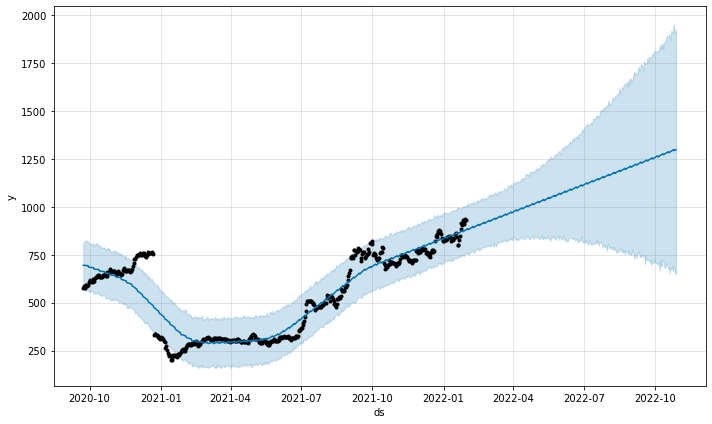

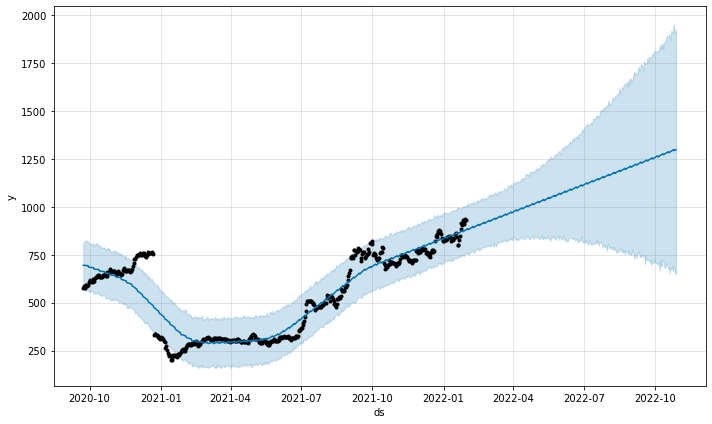

In [36]:
m.plot(forecast)

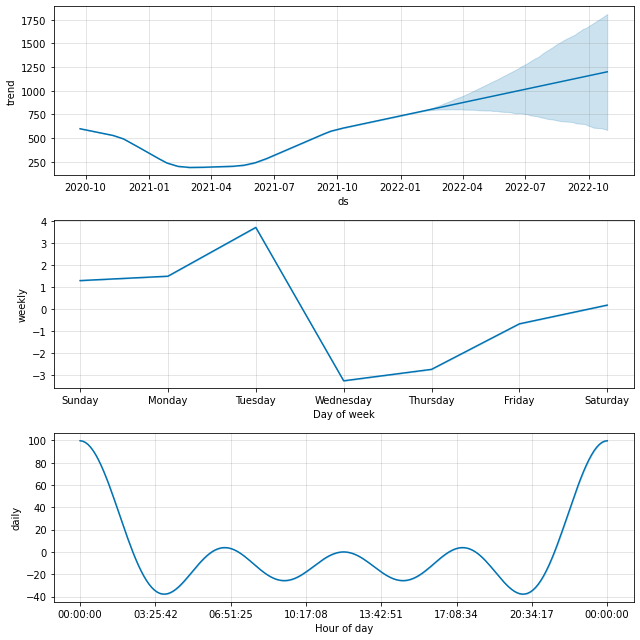

In [37]:
plot2 = m.plot_components(forecast)